# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [143]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [67]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [68]:
# Your code here:
fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [69]:
# Your code here:
fifa['ValueNumeric']=(fifa.Value.str.extract('(\d+?\.?\d+)',expand=True).astype(float))[0]
fifa['ValueNumeric'].unique()

array([110. ,  77. , 118. ,  72. , 102. ,  93. ,  67. ,  80. ,  51. ,
        68. ,  76. ,  44. ,  60. ,  63. ,  89. ,  83. ,  78. ,  58. ,
        53. ,  38. ,  64. ,  27. ,  81. ,  69. ,  59. ,  62. ,  73. ,
        46. ,  43. ,  36. ,  57. ,  24. ,  30. ,   nan,  52. ,  45. ,
        34. ,  61. ,  41. ,  56. ,  50. ,  55. ,  35. ,  39. ,  18. ,
        21. ,  54. ,  40. ,  37. ,  28. ,  32. ,  26. ,  33. ,  15. ,
        22. ,  14. ,  42. ,  31. ,  25. ,  29. ,  16. ,  23. ,  19. ,
         4.2,  20. ,  13. ,  17. ,  11. ,   6.5,  12. ,   4.8,   1.5,
        10. ,   5.5,   4.5,   9.5,   8.5,   1.7,   3.6,   7.5,   3.8,
         2.4,   2.9,   4.7,   4.1,   2.1, 600. ,   2.7,   3.4,   2.5,
         3.2,   3.1,   4.9,   4.3,   2.3, 525. ,   3.9,   1.8,   2.2,
         4.4,   1.6, 900. ,   3.7,   3.5,   1.9, 450. , 775. , 650. ,
       750. ,   2.8,   1.3,   4.6,   2.6,   1.2, 375. ,   3.3, 270. ,
       950. , 550. ,   1.1, 975. ,   1.4, 725. , 425. , 210. , 875. ,
       675. , 325. ,

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [71]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred Foot', 'Position', 'Weak Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric'],
      dtype='object')

In [87]:
data = fifa.rename(columns={'Preferred Foot':'Preferred_Foot'})

In [97]:
# Your code here:
import statsmodels.api as sm
from statsmodels.formula.api import ols

lm=ols('ValueNumeric ~ C(Preferred_Foot)+C(Position)',data=data).fit()

anova_table=sm.stats.anova_lm(lm,typ=2)
anova_table



,sum_sq,df,F,PR(>F)
C(Preferred_Foot),1.457349e+05,1.0,1.724585,1.891221e-01
C(Position),8.508682e+06,26.0,3.872666,1.076979e-10
Residual,1.403279e+09,16606.0,NaN,NaN


In [111]:
# Your code here:
import statsmodels.api as sm
from statsmodels.formula.api import ols

lm=ols('ValueNumeric ~ C(Preferred_Foot,Sum)*C(Position,Sum)',data=data).fit()

anova_table=sm.stats.anova_lm(lm,typ=2)
anova_table

,sum_sq,df,F,PR(>F)
"C(Preferred_Foot, Sum)",1.457349e+05,1.0,1.725463,1.890095e-01
"C(Position, Sum)",8.508682e+06,26.0,3.874637,1.056266e-10
"C(Preferred_Foot, Sum):C(Position, Sum)",2.910183e+06,26.0,1.325223,1.241837e-01
Residual,1.400369e+09,16580.0,NaN,NaN


In [114]:
lm.fvalue
lm.f_pvalue

7.576106812386269e-10

What is your conclusion from this ANOVA?

In [31]:
# Your conclusions here:
#Como el pvalue es menor que .05 se rechaza H0 ya que existe una variación significativa entre la posicion, el pie y el valor, por lo tanto, al menos uno de los medias es diferente. 


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [94]:
# Your code here:

formula='ValueNumeric ~ C(Nationality)'
modelo=ols(formula=formula,data=data).fit()
anova_table=sm.stats.anova_lm(modelo, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Nationality),162.0,3.023346e+07,186626.301891,2.224205,7.393346e-17
Residual,16471.0,1.382031e+09,83906.953204,NaN,NaN


In [115]:
modelo.fvalue
modelo.f_pvalue

7.393346430272165e-17

What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [99]:
# Your code here:
data.isnull().sum()


Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
Preferred_Foot    0
Position          0
WeakFoot          0
Acceleration      0
SprintSpeed       0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
ValueNumeric      0
dtype: int64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [181]:
linreg=linregress(data['Stamina'],data['SprintSpeed'])
linreg

LinregressResult(slope=0.5725508986714635, intercept=28.49967312545295, rvalue=0.6213392940782727, pvalue=0.0, stderr=0.005598544274300529)

In [182]:
R2=linreg[2]**2
R2

0.3860625183656863

In [156]:
# Your code here:
X = sm.add_constant(data.Stamina)
Y = data.SprintSpeed

model = sm.OLS(Y,X).fit()
predictions = model.predict(X) 
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SprintSpeed   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                 1.046e+04
Date:                Tue, 18 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:01:30   Log-Likelihood:                -64263.
No. Observations:               16634   AIC:                         1.285e+05
Df Residuals:                   16632   BIC:                         1.285e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.4997      0.363     78.569      0.000      27.789      29.211
Stamina        0.5726      0.006    102.268      0.000       0.562       0.584
==============================================================================
Omnibus:                      307.010   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              337.031
Skew:                          -0.308   Prob(JB):                     6.53e-74
Kurtosis:                       3.329   Cond. No.                         263.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [152]:
linreg=linregress(data.Potential, data.ValueNumeric)
R2=linreg[2]**2
R2

0.039597078698067084

In [155]:
# Your code here:
X = sm.add_constant(fifa.Potential)
Y = fifa.ValueNumeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     685.7
Date:                Tue, 18 Feb 2020   Prob (F-statistic):          3.76e-148
Time:                        16:00:54   Log-Likelihood:            -1.1766e+05
No. Observations:               16634   AIC:                         2.353e+05
Df Residuals:                   16632   BIC:                         2.353e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        958.4356     25.671     37.335      0.000     908.117    1008.754
Potential     -9.4345      0.360    -26.186      0.000     -10.141      -8.728
==============================================================================
Omnibus:                     1769.540   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2128.031
Skew:                           0.846   Prob(JB):                         0.00
Kurtosis:                       2.543   Cond. No.                         826.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

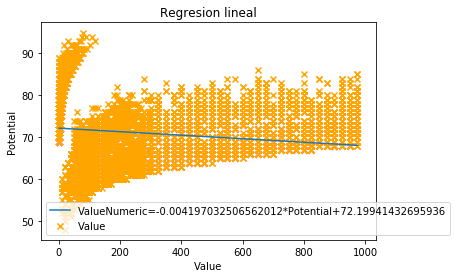

In [163]:
# Your code here:

linreg=linregress(data.ValueNumeric,data.Potential)
linreg

x=np.linspace(data.ValueNumeric.min(), data.ValueNumeric.max(), 10)
y=linreg[1]+linreg[0]*x
plt.plot(x, y, label='ValueNumeric={}*Potential+{}'.format(linreg[0], linreg[1]))
plt.scatter(data.ValueNumeric,data.Potential, marker='x', c='orange', label='Value')
plt.title('Regresion lineal')
plt.xlabel('Value')
plt.ylabel('Potential')
plt.legend()
plt.show();
